In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
train=pd.read_csv('Loan_Status_train.csv')
test=pd.read_csv('Loan_Status_test.csv')

In [3]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
train.shape,test.shape

((614, 13), (367, 12))

# Univariate Analysis

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

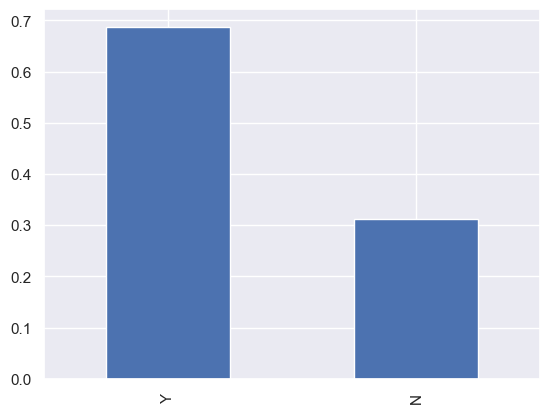

In [12]:
train['Loan_Status'].value_counts(normalize=True).plot(kind='bar')

The loan of 422 people out of 614 was approved.
The approval rate is around 69%

The loan of 422 people out of 614 was approved.
The approval rate is around 69%

# Categorical Variable

In [13]:
cat_var=['Gender','Married','Self_Employed','Credit_History']

In [14]:
def plot_categorical(cat_var):
    size=len(cat_var)
    plt.figure(figsize=(20,10))
    for j,i in enumerate(cat_var):
        plt.subplot(2,2,j+1)
        train[i].value_counts(normalize=True).plot.bar(title=i)

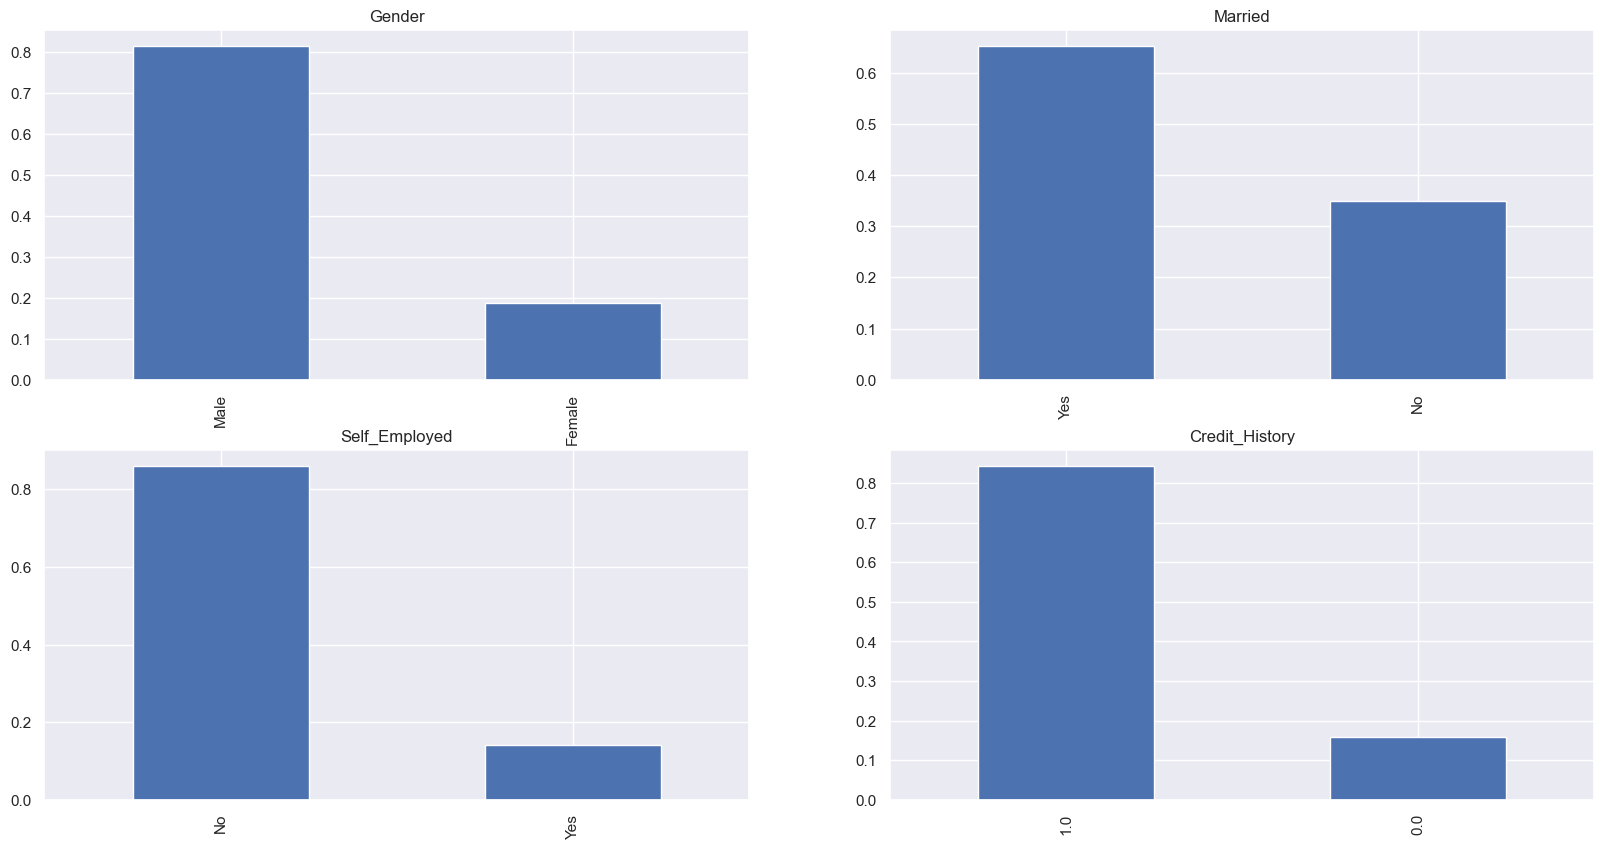

In [15]:
plot_categorical(cat_var)

# Ordinal Variable

In [16]:
ordinal_var=['Education','Dependents','Property_Area']

In [18]:
def plot_ordinal(ordinal_var):
    plt.figure(figsize=(20,10))
    for j,i in enumerate(ordinal_var):
        plt.subplot(2,2,j+1)
        train[i].value_counts(normalize=True).plot.bar(title=i)

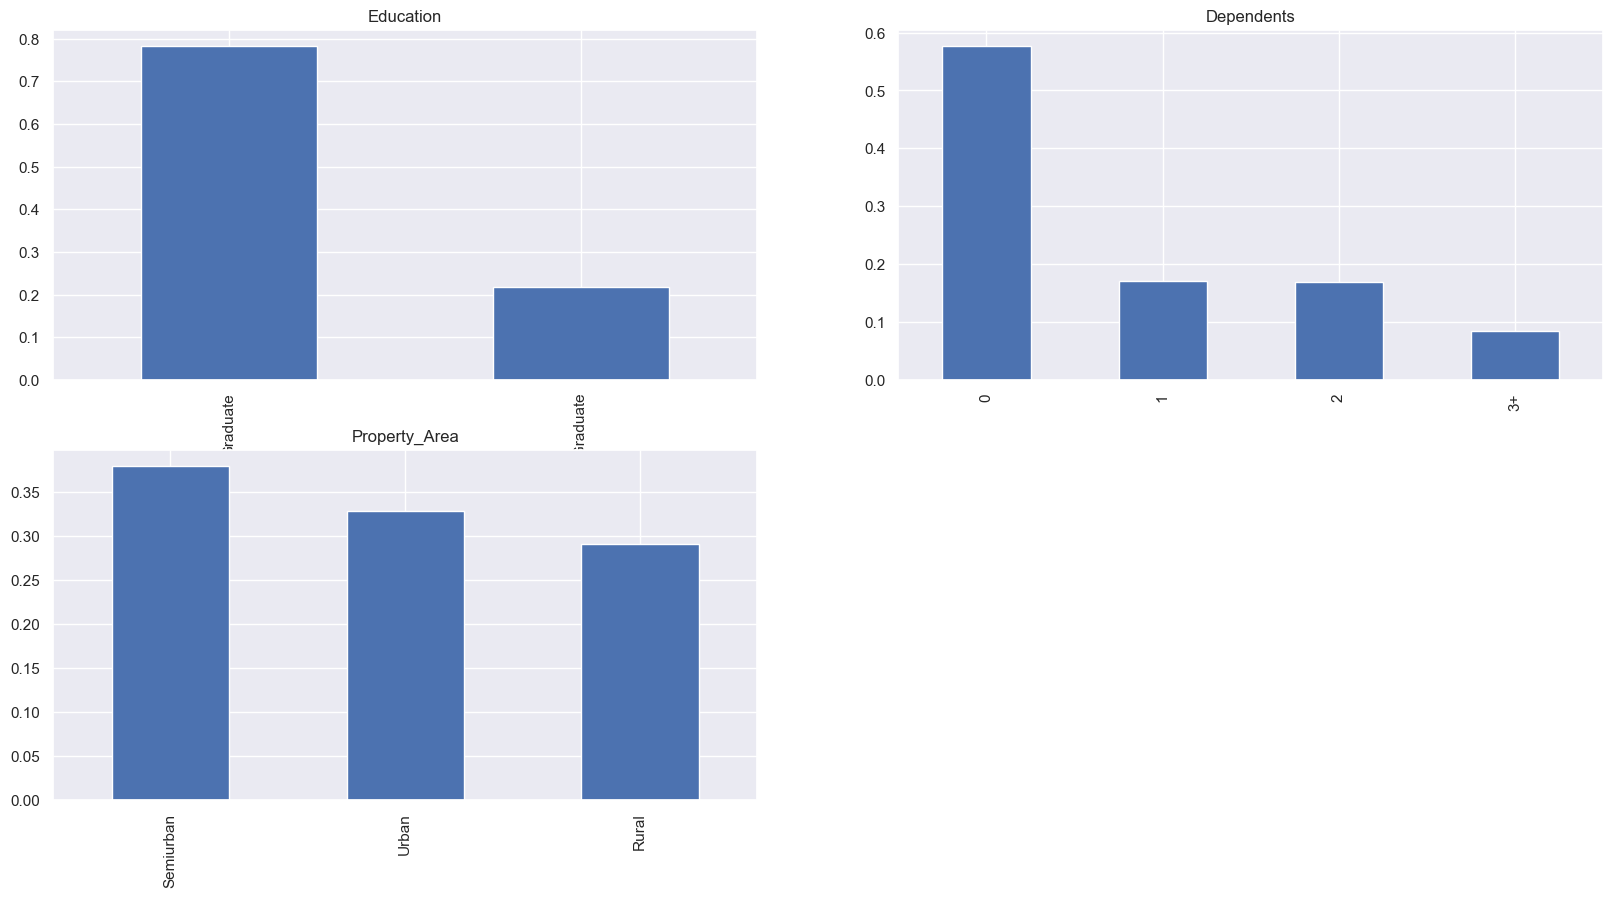

In [19]:
plot_ordinal(ordinal_var)

Following inferences can be made from the above bar plots:

Most of the applicants don’t have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area.

# Numerical variable

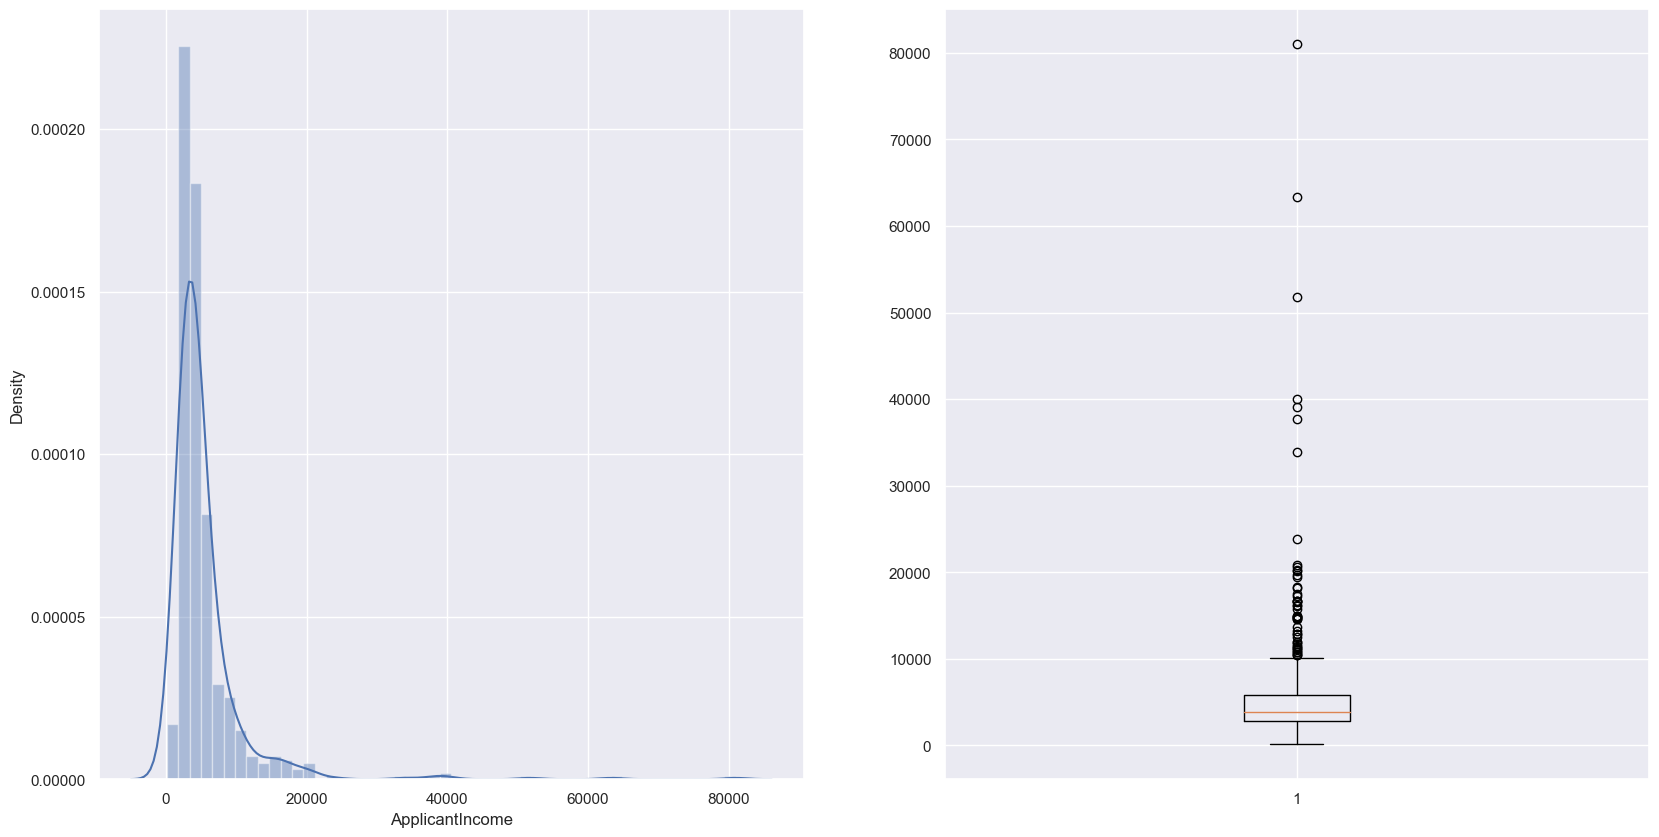

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(train['ApplicantIncome'])
plt.subplot(1,2,2)
plt.boxplot(train['ApplicantIncome'])
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society

Text(0.5, 0.98, '')

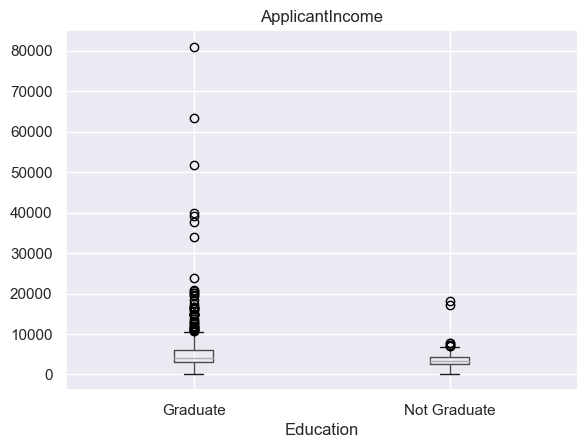

In [21]:
train.boxplot(column='ApplicantIncome' ,by='Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

<AxesSubplot:>

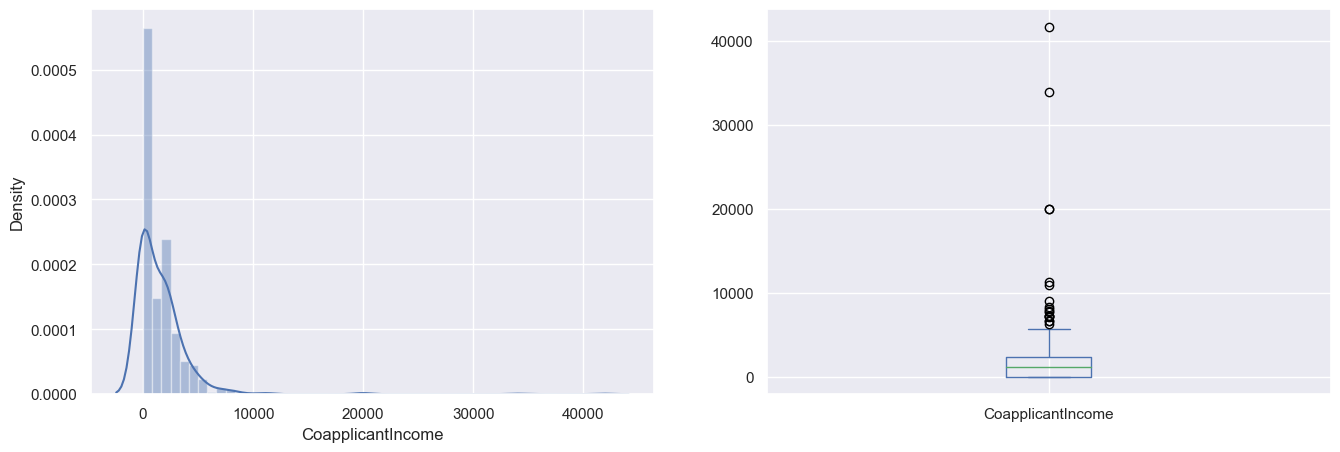

In [23]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

<AxesSubplot:>

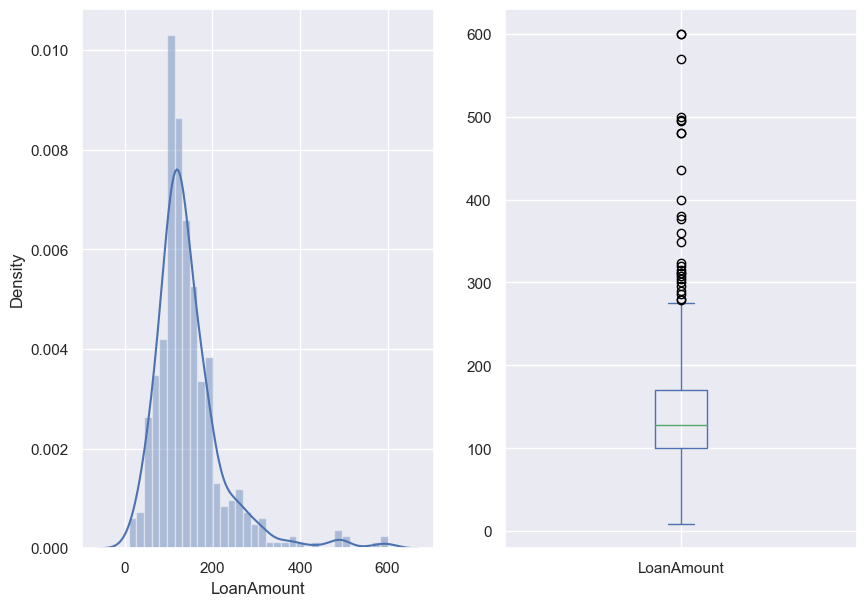

In [24]:
plt.figure(1)
df=train.dropna()
plt.subplot(121)
sns.distplot(df['LoanAmount'])
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(10,7))

- Outliers are present
- The distribution is fairly normal.

# Bivariate Analysis

# categorical vs target variable

<AxesSubplot:xlabel='Gender'>

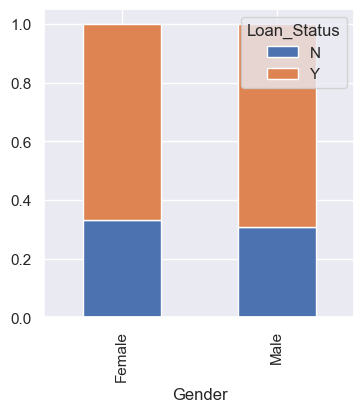

In [25]:
Gender= pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

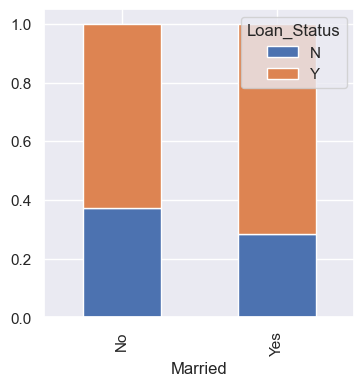

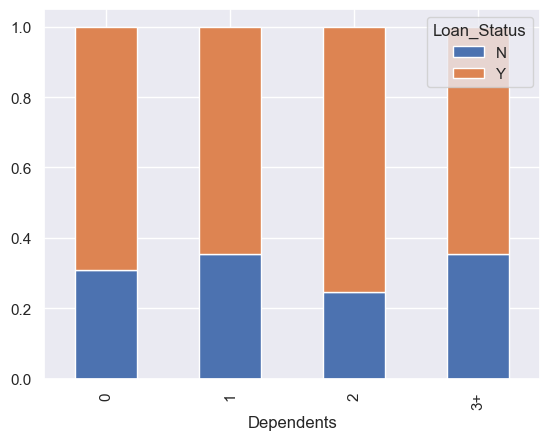

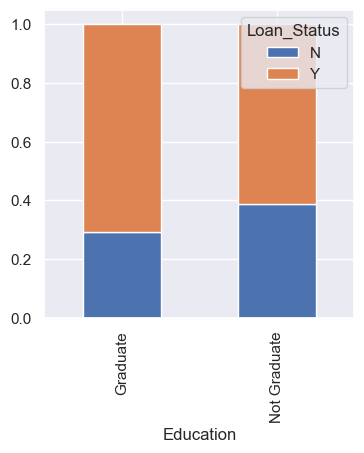

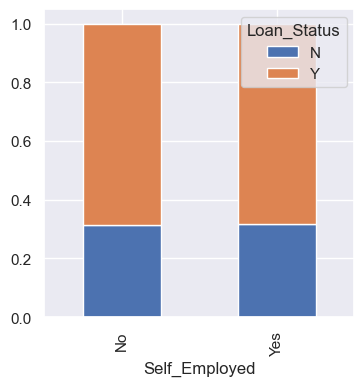

In [26]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

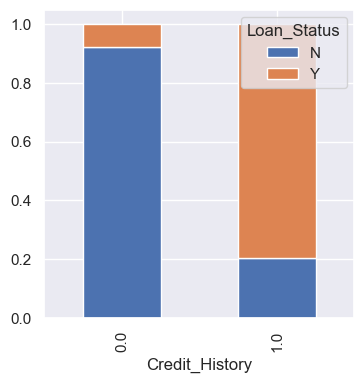

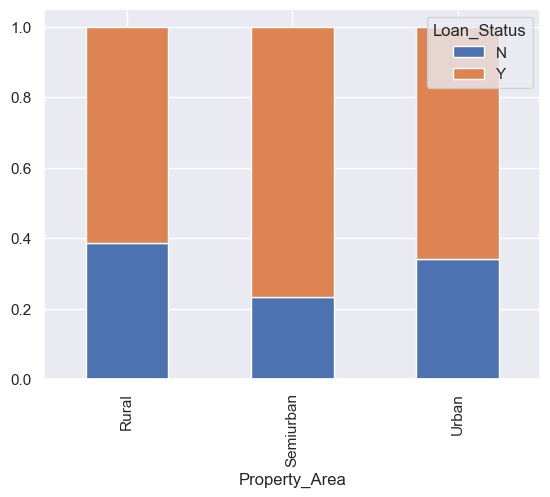

In [27]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

- It seems people with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

# Numerical variable vs target Variable

<AxesSubplot:title={'center':'loan status and applicant income'}, xlabel='Loan_Status'>

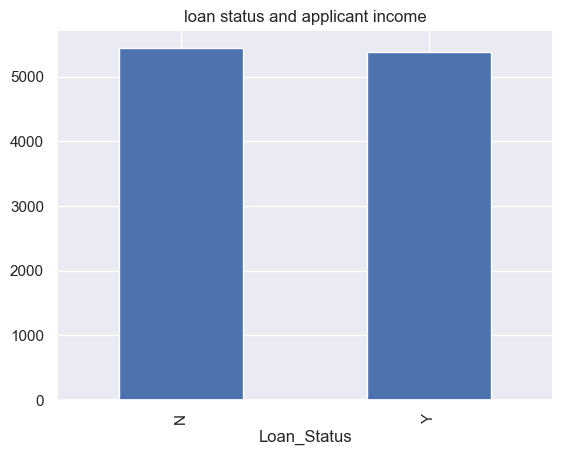

In [28]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar',title='loan status and applicant income')

There is not visible difference between the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='CoapplicantIncome_bin'>

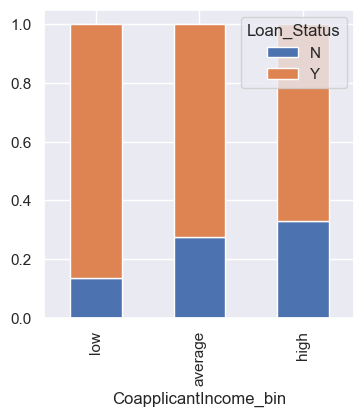

In [29]:
bins=[0,1000,3000,42000]
group=['low','average','high']
train['CoapplicantIncome_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
CoapplicantIncome_bin = pd.crosstab(train['CoapplicantIncome_bin'],train['Loan_Status'])
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

- if coapplicant’s income is less the chances of loan approval are high

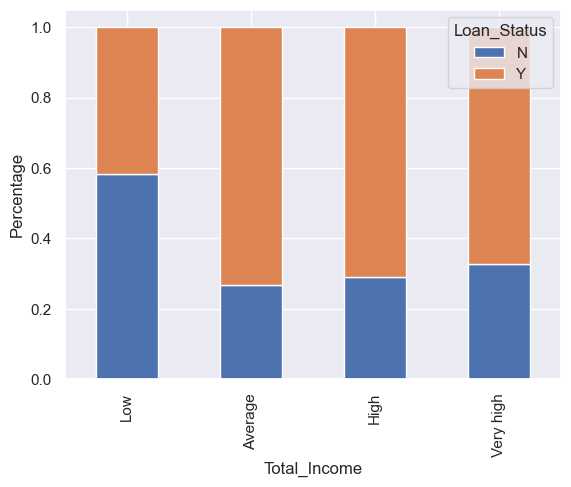

In [30]:
#new variable in which we will combine the applicant’s and coapplicant’s income t
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

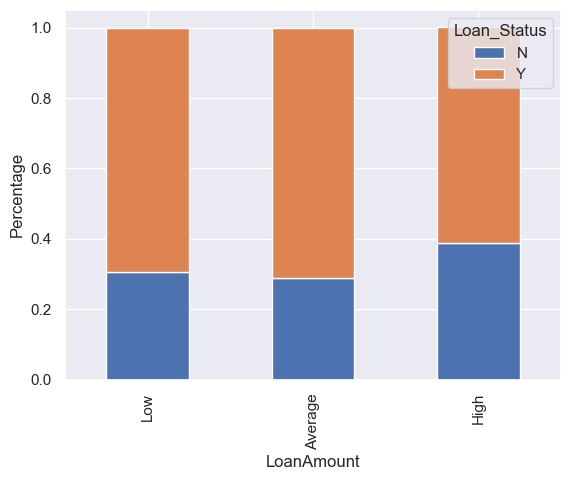

In [31]:
bins=[0,100,200,700]
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

- the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount

In [32]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,NaN,6000.0,High,Average


In [33]:
train=train.drop(['Total_Income_bin','LoanAmount_bin','CoapplicantIncome_bin'],axis=1)

In [34]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [35]:
train['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

In [36]:
train['Loan_Status']=train['Loan_Status'].astype('int64')

<AxesSubplot:>

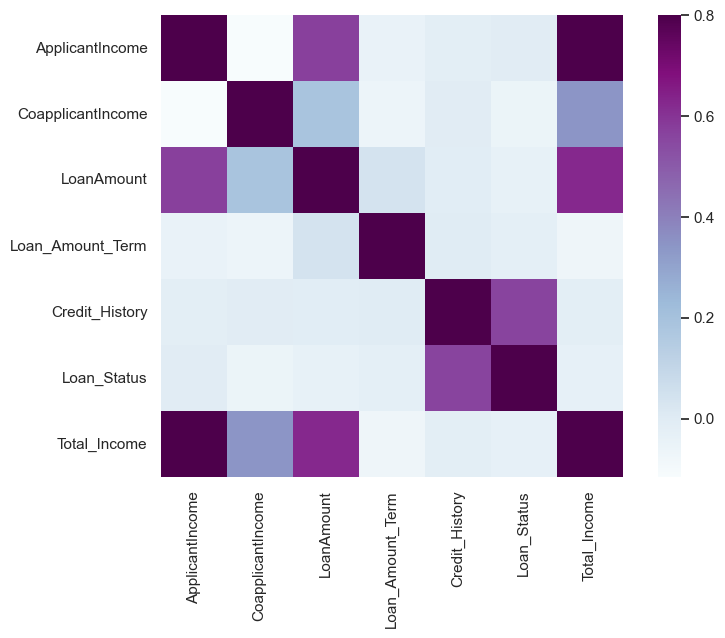

In [37]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')

- loan Status is highly correlated with credit history
- applicant Income and loan amount are highly correlated
- loan amount and total income is highly correlated
- Loan amount is highly correlated with coappicant income

# Missing value and outlier Treatment

In [38]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

- there are missing value in__Gender__,Married,Dependents,Self_Employed,LoanAmount,Loant_Amount_term,credit_history,

- we will be imputing categorical data with mode

- we will be imputing numeric data with mean and median

In [39]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [40]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
 13  Total_Income       614 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 67.3+ KB


In [42]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

<AxesSubplot:>

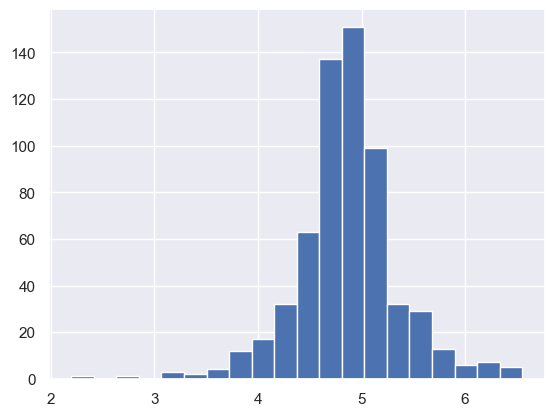

In [43]:
train['LoanAmountLog']=np.log(train['LoanAmount'])
test['LoanAmountLog']=np.log(test['LoanAmount'])
train['LoanAmountLog'].hist(bins=20)

- the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

In [44]:
train.head(5)
test['Total_Income'] =test['ApplicantIncome']+test['CoapplicantIncome']

In [45]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmountLog,Total_Income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

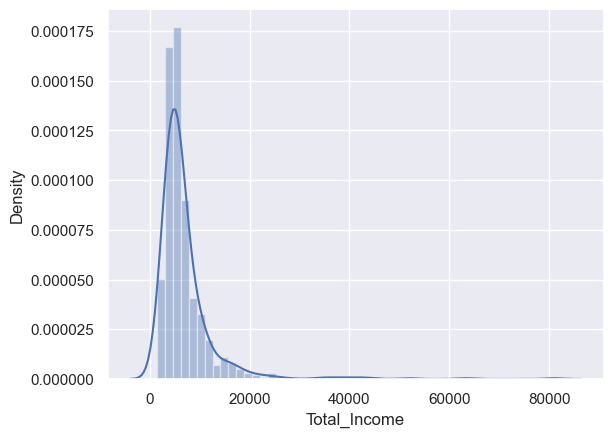

In [46]:
sns.distplot(train['Total_Income'])

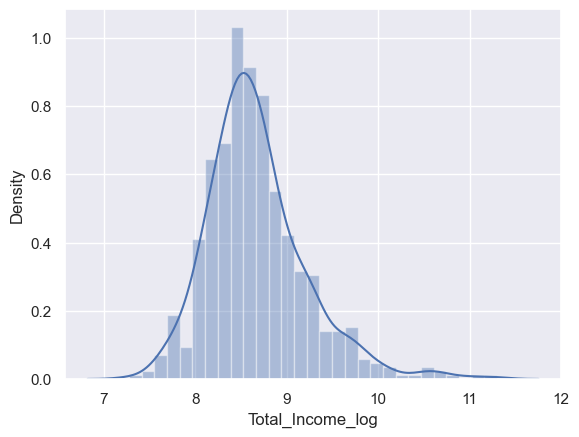

In [47]:
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log']= np.log(train['Total_Income'])

- After taking the log transformation to make the distribution normal.
- Now the distribution looks much closer to normal

In [48]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

- calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

<AxesSubplot:xlabel='EMI', ylabel='Density'>

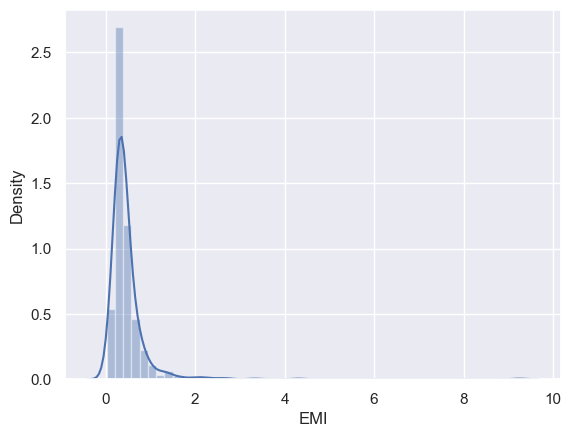

In [49]:
sns.distplot(train['EMI'])

In [50]:
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000)

- the income left after the EMI has been paid

<AxesSubplot:xlabel='Balance_Income', ylabel='Density'>

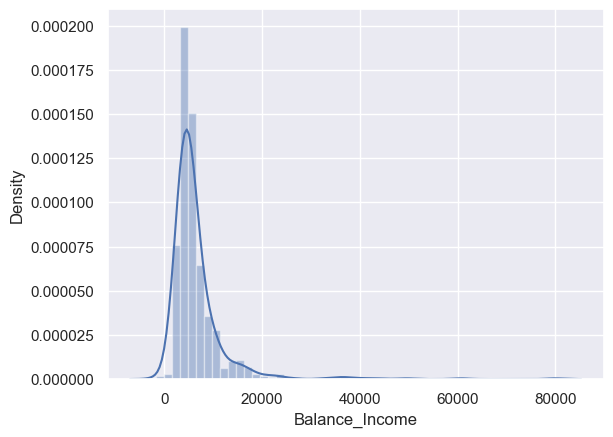

In [51]:
sns.distplot(train['Balance_Income'])

In [52]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [53]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmountLog,Total_Income_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,5849.0,4.852030,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,6091.0,4.852030,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,3000.0,4.189655,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4941.0,4.787492,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,6000.0,4.948760,8.699515,0.391667,5608.333333


In [54]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmountLog,Total_Income,Total_Income_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.700480,5720,8.674026,0.305556,5414.444444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.836282,4576,8.714568,0.350000,4226.000000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,5.337538,6800,8.006368,0.577778,6222.222222
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.605170,4886,8.505323,0.277778,4608.222222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.356709,3276,8.699515,0.216667,3059.333333


In [55]:
train=train.drop('Loan_ID',axis=1)
test_loan_id=test['Loan_ID']
test=test.drop('Loan_ID',axis=1)

In [56]:
train.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmountLog,Total_Income_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,1,5849.0,4.852030,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,0,6091.0,4.852030,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,3000.0,4.189655,8.006368,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4941.0,4.787492,8.505323,0.333333,4607.666667
4,Male,No,0,Graduate,No,1.0,Urban,1,6000.0,4.948760,8.699515,0.391667,5608.333333


In [57]:
test.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmountLog,Total_Income,Total_Income_log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,1.0,Urban,4.700480,5720,8.674026,0.305556,5414.444444
1,Male,Yes,1,Graduate,No,1.0,Urban,4.836282,4576,8.714568,0.350000,4226.000000
2,Male,Yes,2,Graduate,No,1.0,Urban,5.337538,6800,8.006368,0.577778,6222.222222
3,Male,Yes,2,Graduate,No,1.0,Urban,4.605170,4886,8.505323,0.277778,4608.222222
4,Male,No,0,Not Graduate,No,1.0,Urban,4.356709,3276,8.699515,0.216667,3059.333333


In [58]:
y=train.Loan_Status
X=train.drop(['Loan_Status'],axis=1)

In [59]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Total_Income,LoanAmountLog,Total_Income_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,5849.0,4.85203,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,6091.0,4.85203,8.714568,0.355556,5735.444444


In [60]:
y.head(2)

0    1
1    0
Name: Loan_Status, dtype: int64

In [61]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)
train.shape,test.shape

((614, 22), (367, 21))

In [62]:
X.head(5)

,Credit_History,Total_Income,LoanAmountLog,Total_Income_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,5849.0,4.852030,8.674026,0.355556,5493.444444,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,1.0,6091.0,4.852030,8.714568,0.355556,5735.444444,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,1.0,3000.0,4.189655,8.006368,0.183333,2816.666667,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,1.0,4941.0,4.787492,8.505323,0.333333,4607.666667,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,1.0,6000.0,4.948760,8.699515,0.391667,5608.333333,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


- Dummy variables for Categorical Variable so each category can be given as a seperate feature to the model

In [63]:
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [64]:
from sklearn.metrics import confusion_matrix as cm

In [65]:
train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [66]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [67]:
i=1
kf=StratifiedKFold(n_splits=10,random_state=6,shuffle=True)
accuracy_list=[]
for train_index , test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y.loc[train_index],y.loc[test_index]
    model=rfc(n_estimators=100,criterion='gini', max_depth=4)
    model.fit(X,y)
    pred_train=model.predict(X)
   
    score=accuracy_score(y,pred_train)
    accuracy_list.append(score)
    print('accuracy_score',score)


1 of kfold 10
accuracy_score 0.8273615635179153

1 of kfold 10
accuracy_score 0.8241042345276873

1 of kfold 10
accuracy_score 0.8257328990228013

1 of kfold 10
accuracy_score 0.8241042345276873

1 of kfold 10
accuracy_score 0.8224755700325733

1 of kfold 10
accuracy_score 0.8241042345276873

1 of kfold 10
accuracy_score 0.8289902280130294

1 of kfold 10
accuracy_score 0.8241042345276873

1 of kfold 10
accuracy_score 0.8224755700325733

1 of kfold 10
accuracy_score 0.8241042345276873


In [68]:
mean_accuracy_rfc=sum(accuracy_list)/len(accuracy_list)

In [69]:
mean_accuracy_rfc

0.8247557003257329

In [70]:
original_test_predictions=model.predict(test)

In [74]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV

xgb_model = xgb.XGBClassifier(objective = "binary:logistic")

params = {
            'eta': np.arange(0.1, 0.26, 0.05),
            
            'gamma': [5],
            
            
        }



skf = StratifiedKFold(n_splits=20, shuffle = True)

grid = GridSearchCV(xgb_model, 
                    param_grid = params, 
                    
                    n_jobs = -1, 
                    cv = skf.split(X, y),
                    refit = "accuracy_score")

grid.fit(X,y)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000021029EE3C10>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=N...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None